# RNA-Seq Result with AdaBoost

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
path2 = Path("/home/znazari/data")# where the output data will be saved at the end.
path3 = Path("/home/znazari/ppmi_files/External_data") 


In [3]:
x_data = pd.read_csv(path3/"AdaBoost_params_all_top_models_summary - Foglio2-1.csv")
x_data

,Unnamed: 0,Unnamed: 1,20,26,35,47,63,84,111,148,197,263,526,1052,2204
0,Transciptomics,NaN,Accuracy,Accuracy,Accuracy,Accuracy,Accuracy,Accuracy,Accuracy,Accuracy,Accuracy,Accuracy,Accuracy,Accuracy,Accuracy
1,NaN,MAX,0.75,0.7804878049,0.8109756098,0.8109756098,0.8292682927,0.8780487805,0.8719512195,0.8719512195,0.8780487805,0.8597560976,0.8292682927,0.7865853659,0.743902439
2,NaN,Mean+SD,0.6944968388,0.7252820195,0.7508586548,0.7780306979,0.7936057091,0.8128085109,0.8202057869,0.8170694547,0.807813753,0.8012584736,0.7687363458,0.7463821813,0.7284171258
3,NaN,Mean,0.6630644772,0.691922241,0.7233759961,0.7497585124,0.7668437575,0.7840328985,0.7858609032,0.7846406288,0.7725790872,0.7709490461,0.7361144651,0.7186088528,0.6977730647
4,NaN,Mean-SD,0.6316321156,0.6585624625,0.6958933374,0.7214863269,0.740081806,0.7552572861,0.7515160195,0.7522118029,0.7373444214,0.7406396187,0.7034925844,0.6908355243,0.6671290035
5,NaN,MIN,0.5853658537,0.6097560976,0.6707317073,0.6829268293,0.7134146341,0.6951219512,0.6951219512,0.6829268293,0.6890243902,0.6768292683,0.6707317073,0.6463414634,0.6280487805
6,NaN,NaN,AUC,AUC,AUC,AUC,AUC,AUC,AUC,AUC,AUC,AUC,AUC,AUC,AUC
7,NaN,MAX,0.7481234362,0.7994588572,0.85891748,0.8727595386,0.8913690476,0.9081651209,0.9227391021,0.9260942761,0.9229497354,0.9112280702,0.8694868011,0.8224206349,0.8287719298
8,NaN,Mean+SD,0.7109393764,0.7522567665,0.8010998029,0.8322090566,0.8636036098,0.877203063,0.8861460161,0.8806550361,0.8722506533,0.8659224385,0.82660857,0.800736112,0.7702117018
9,NaN,Mean,0.6773797291,0.7167216312,0.7726891239,0.803887085,0.8384744049,0.8512509038,0.8545631934,0.8518823547,0.8408748008,0.8364333949,0.793221881,0.7639840209,0.7300988616


In [4]:
x1_data = x_data.iloc[1:6]
x2_data = x1_data.iloc[:, 1:]
x2_data.set_index('Unnamed: 1', inplace=True)
x2_data.index.name = 'Accuracy'
x12_data = x2_data.astype(float).round(2)
x12_data

,20,26,35,47,63,84,111,148,197,263,526,1052,2204
Accuracy,,,,,,,,,,,,,
MAX,0.75,0.78,0.81,0.81,0.83,0.88,0.87,0.87,0.88,0.86,0.83,0.79,0.74
Mean+SD,0.69,0.73,0.75,0.78,0.79,0.81,0.82,0.82,0.81,0.80,0.77,0.75,0.73
Mean,0.66,0.69,0.72,0.75,0.77,0.78,0.79,0.78,0.77,0.77,0.74,0.72,0.70
Mean-SD,0.63,0.66,0.70,0.72,0.74,0.76,0.75,0.75,0.74,0.74,0.70,0.69,0.67
MIN,0.59,0.61,0.67,0.68,0.71,0.70,0.70,0.68,0.69,0.68,0.67,0.65,0.63


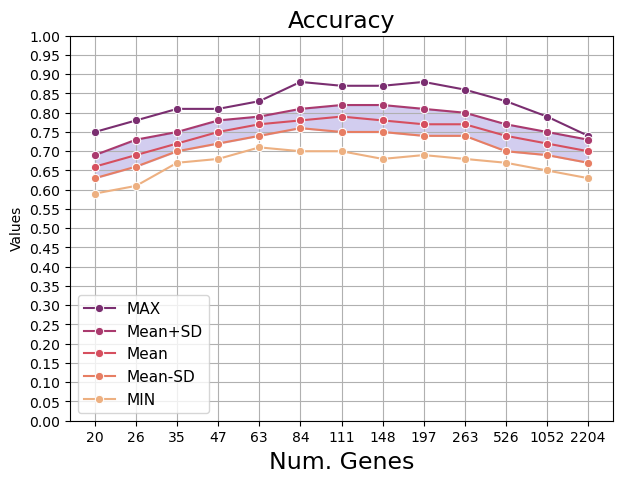

In [5]:
df = x12_data

# Transpose the DataFrame
df_transposed = df.transpose()

# Define color palette
palette = sns.color_palette("flare", as_cmap=True)

# Create a line plot with markers for each statistic
plt.figure(figsize=(7, 5))

for i, column in enumerate(df_transposed.columns):
    color = palette((4-i) / len(df_transposed.columns))
    sns.lineplot(data=df_transposed, x=df_transposed.index, y=column, marker='o', label=column, color=color)

# Fill color between Mean-SD and Mean+SD
plt.fill_between(df_transposed.index, df_transposed['Mean-SD'], df_transposed['Mean+SD'], color='slateblue', alpha=0.3)

plt.xlabel('Num. Genes',  fontsize=17)
plt.ylabel('Values')
plt.title('Accuracy',  fontsize=17)
plt.grid(True)
plt.ylim(0, 1)
plt.yticks([i/20 for i in range(21)])
plt.legend(fontsize=11)
plt.show( )


In [6]:
auc_data = x_data.iloc[7:12]
auc2_data = auc_data.iloc[:, 1:]
auc2_data.set_index('Unnamed: 1', inplace=True)
auc2_data.index.name = 'AUC'
auc12_data=auc2_data.astype(float).round(2)
auc12_data

,20,26,35,47,63,84,111,148,197,263,526,1052,2204
AUC,,,,,,,,,,,,,
MAX,0.75,0.80,0.86,0.87,0.89,0.91,0.92,0.93,0.92,0.91,0.87,0.82,0.83
Mean+SD,0.71,0.75,0.80,0.83,0.86,0.88,0.89,0.88,0.87,0.87,0.83,0.80,0.77
Mean,0.68,0.72,0.77,0.80,0.84,0.85,0.85,0.85,0.84,0.84,0.79,0.76,0.73
Mean-SD,0.64,0.68,0.74,0.78,0.81,0.83,0.82,0.82,0.81,0.81,0.76,0.73,0.69
MIN,0.57,0.61,0.71,0.72,0.76,0.78,0.78,0.77,0.77,0.77,0.71,0.68,0.67


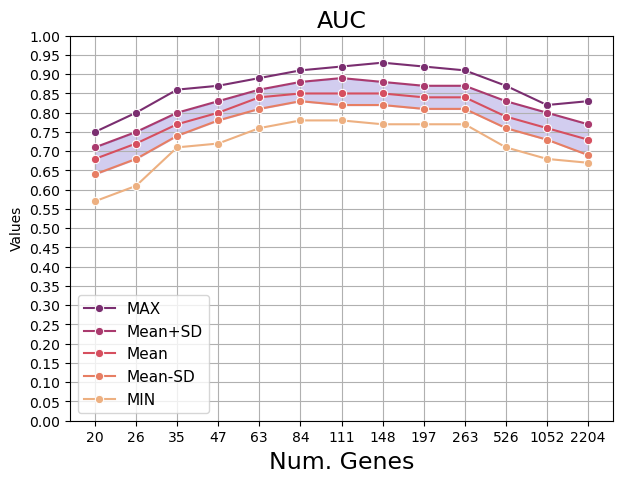

In [7]:
df = auc12_data

# Transpose the DataFrame
df_transposed = df.transpose()

# Define color palette
palette = sns.color_palette("flare", as_cmap=True)

# Create a line plot with markers for each statistic
plt.figure(figsize=(7, 5))

for i, column in enumerate(df_transposed.columns):
    color = palette((4-i) / len(df_transposed.columns))
    sns.lineplot(data=df_transposed, x=df_transposed.index, y=column, marker='o', label=column, color=color)

# Fill color between Mean-SD and Mean+SD
plt.fill_between(df_transposed.index, df_transposed['Mean-SD'], df_transposed['Mean+SD'], color='slateblue', alpha=0.3)

plt.xlabel('Num. Genes',fontsize=17)
plt.ylabel('Values')
plt.title('AUC',  fontsize=17)
plt.grid(True)
plt.ylim(0, 1)
plt.yticks([i/20 for i in range(21)])
plt.legend(fontsize=11)
plt.show()


In [8]:
s_data = x_data.iloc[13:18]
s1_data = s_data.iloc[:, 1:]
s1_data.set_index('Unnamed: 1', inplace=True)
s1_data.index.name = 'Sensitivity'
s12_data=s1_data.astype(float).round(2)
s12_data

,20,26,35,47,63,84,111,148,197,263,526,1052,2204
Sensitivity,,,,,,,,,,,,,
MAX,0.60,0.61,0.71,0.72,0.73,0.81,0.71,0.77,0.72,0.65,0.72,0.53,0.45
Mean+SD,0.44,0.49,0.56,0.61,0.62,0.63,0.62,0.62,0.59,0.56,0.51,0.45,0.39
Mean,0.38,0.43,0.49,0.54,0.55,0.56,0.54,0.55,0.52,0.50,0.43,0.39,0.33
Mean-SD,0.31,0.36,0.43,0.48,0.49,0.49,0.46,0.47,0.45,0.44,0.36,0.32,0.26
MIN,0.22,0.21,0.33,0.38,0.37,0.35,0.37,0.36,0.34,0.38,0.31,0.24,0.21


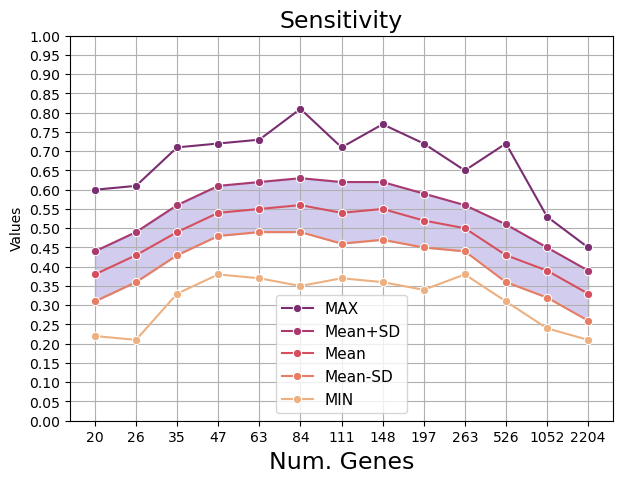

In [9]:
df = s12_data

# Transpose the DataFrame
df_transposed = df.transpose()

# Define color palette
palette = sns.color_palette("flare", as_cmap=True)

# Create a line plot with markers for each statistic
plt.figure(figsize=(7, 5))

for i, column in enumerate(df_transposed.columns):
    color = palette((4-i) / len(df_transposed.columns))
    sns.lineplot(data=df_transposed, x=df_transposed.index, y=column, marker='o', label=column, color=color)

# Fill color between Mean-SD and Mean+SD
plt.fill_between(df_transposed.index, df_transposed['Mean-SD'], df_transposed['Mean+SD'], color='slateblue', alpha=0.3)

plt.xlabel('Num. Genes',fontsize=17)
plt.ylabel('Values')
plt.title('Sensitivity', fontsize=17)
plt.grid(True)
plt.ylim(0, 1)
plt.yticks([i/20 for i in range(21)])
plt.legend(fontsize=11)
plt.show()


In [10]:
sp_data = x_data.iloc[19:24]
sp1_data = sp_data.iloc[:, 1:]
sp1_data.set_index('Unnamed: 1', inplace=True)
sp1_data.index.name = 'Specificity'
sp12_data=sp1_data.astype(float).round(2)
sp12_data

,20,26,35,47,63,84,111,148,197,263,526,1052,2204
Specificity,,,,,,,,,,,,,
MAX,0.94,0.92,0.93,0.95,0.94,0.97,0.98,0.98,0.97,0.98,0.98,0.96,0.95
Mean+SD,0.86,0.88,0.88,0.90,0.91,0.93,0.95,0.94,0.95,0.94,0.94,0.93,0.92
Mean,0.82,0.83,0.84,0.86,0.89,0.90,0.92,0.91,0.91,0.91,0.90,0.89,0.89
Mean-SD,0.77,0.79,0.81,0.82,0.86,0.87,0.88,0.88,0.88,0.88,0.86,0.85,0.86
MIN,0.69,0.74,0.74,0.76,0.81,0.78,0.83,0.78,0.80,0.83,0.83,0.82,0.83


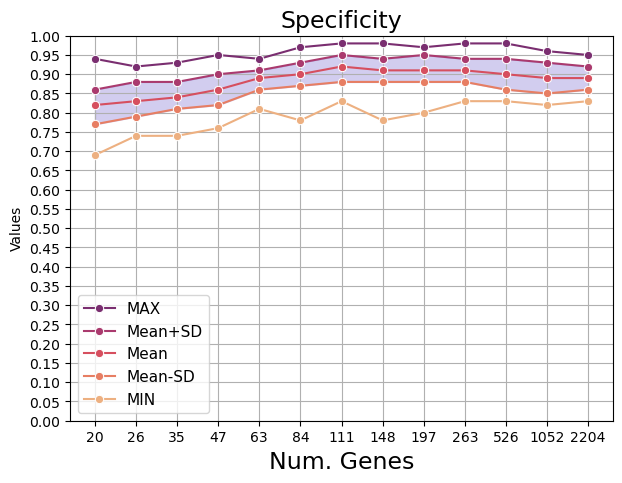

In [11]:
df = sp12_data

# Transpose the DataFrame
df_transposed = df.transpose()

# Define color palette
palette = sns.color_palette("flare", as_cmap=True)

# Create a line plot with markers for each statistic
plt.figure(figsize=(7, 5))

for i, column in enumerate(df_transposed.columns):
    color = palette((4-i) / len(df_transposed.columns))
    sns.lineplot(data=df_transposed, x=df_transposed.index, y=column, marker='o', label=column, color=color)

# Fill color between Mean-SD and Mean+SD
plt.fill_between(df_transposed.index, df_transposed['Mean-SD'], df_transposed['Mean+SD'], color='slateblue', alpha=0.3)

plt.xlabel('Num. Genes',fontsize=17)
plt.ylabel('Values')
plt.title('Specificity',fontsize=17)
plt.grid(True)
plt.ylim(0, 1)
plt.yticks([i/20 for i in range(21)])
plt.legend(fontsize=11)
plt.show()


In [12]:
# All data (ignore!)
df = pd.read_excel(path2/"AdaBoost_params_all_top_models.xlsx",header=None)
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned

,1,2,3,4,5,6,7,8,9,10,...,295,296,297,298,299,300,301,302,303,304
0,2204.0,2204_genes,NaN,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2204.0,2204_genes,AUC,0.79548,0.748211,0.774306,0.686932,0.675676,0.714286,0.828772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2204.0,2204_genes,Accuracy,0.670732,0.676829,0.719512,0.713415,0.707317,0.713415,0.743902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2204.0,2204_genes,Sensitivity,0.220339,0.258621,0.375,0.318182,0.45283,0.392857,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2204.0,2204_genes,Specificity,0.92381,0.90566,0.898148,0.858333,0.828829,0.87963,0.912281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,20.0,20_genes,Accuracy,0.634146,0.652439,0.597561,0.682927,0.72561,0.664634,0.585366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,20.0,20_genes,Sensitivity,0.242857,0.416667,0.222222,0.440678,0.595745,0.309091,0.358491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,20.0,20_genes,Specificity,0.925532,0.75,0.831683,0.819048,0.777778,0.844037,0.693694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,20.0,20_genes,Kappa,0.183809,0.165655,0.0596,0.273966,0.357591,0.169123,0.052184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Get the current date
current_date = datetime.now().date()

print("Last update :", current_date)

Last update : 2024-03-31
